# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.079674e+01     8.047040e+00
 * time: 0.0013759136199951172
     1     2.365480e+01     4.424762e+00
 * time: 0.006610870361328125
     2     1.750929e+01     3.755820e+00
 * time: 0.010234832763671875
     3     1.321249e+01     2.629033e+00
 * time: 0.013988971710205078
     4     1.058782e+01     1.423967e+00
 * time: 0.017843961715698242
     5     9.973145e+00     2.253247e+00
 * time: 0.021235942840576172
     6     9.442267e+00     1.253883e+00
 * time: 0.025254011154174805
     7     9.069745e+00     1.209667e+00
 * time: 0.030774831771850586
     8     8.770408e+00     1.101218e+00
 * time: 0.03539586067199707
     9     8.564560e+00     6.927524e-01
 * time: 0.040875911712646484
    10     8.406619e+00     5.898114e-01
 * time: 0.08348202705383301
    11     8.384658e+00     9.205415e-01
 * time: 0.08605289459228516
    12     8.341814e+00     6.755300e-01
 * time: 0.08846688270568848
    13     8.325997e+00     9.438650e-0

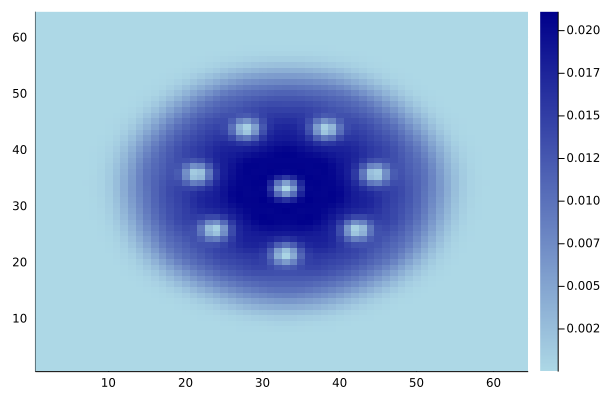

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)